<a href="https://colab.research.google.com/github/devjaime/data_science_escalab/blob/main/Copia_de_2021_12_07_Clase_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Consolidación de Datos

- Es normal encontrar datos repartidos entre distintas fuentes, ya sean archivos o bases de datos.
- También es común ver datos organizados de una forma "poco intuitiva" o que no es fácil de entender.
- Hoy nos enfocaremos en herramientas que nos ayuden a combinar, mezclar y reorganizar datos.

In [ ]:
from io import StringIO

import numpy as np
import pandas as pd

## Índices y columnas

`Pandas` acepta columnas y filas con el mismo nombre, pero en la mayoría de los casos no tiene mucho sentido y puede desencadenar errores.

In [ ]:
data1 = pd.Series(np.random.randn(5), index=[0,1,1,2,2])
data1

0   -2.002092
1   -0.035184
1   -0.219052
2   -0.327824
2   -0.484474
dtype: float64

In [ ]:
data1[1]

1   -0.035184
1   -0.219052
dtype: float64

In [ ]:
data2 = pd.DataFrame({
    'col_x': range(10,20),
    'col_x': range(10), # dict con keys repetidas, el último sobreescribe al anterior
    '0':range(40,50),
    0:range(70,80)
})

data2

,col_x,0,0
0,0,40,70
1,1,41,71
2,2,42,72
3,3,43,73
4,4,44,74
5,5,45,75
6,6,46,76
7,7,47,77
8,8,48,78
9,9,49,79


In [ ]:
data2.rename(columns={0:'col_x'}, inplace=True)
data2.col_x

,col_x,col_x
0,0,70
1,1,71
2,2,72
3,3,73
4,4,74
5,5,75
6,6,76
7,7,77
8,8,78
9,9,79


In [ ]:
data2.loc[:,['col_x']]

,col_x,col_x
0,0,70
1,1,71
2,2,72
3,3,73
4,4,74
5,5,75
6,6,76
7,7,77
8,8,78
9,9,79


## Indexación jerárquica

- La *indexación jerárquica* es una funcionalidad de `pandas` que permite dos o más niveles de índices en un eje.
- De forma abstracta, nos permite manejar mayores dimensiones de datos en una presentación de dos dimensiones.
- También llamado `MultiIndex`.

### Series

In [ ]:
data3 = pd.Series(
  np.random.randn(9),
  index=[
    ['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
    [1, 2, 3, 1, 2, 3, 1, 2, 3]
  ]
)

data3

a  1    1.350135
   2   -0.233801
   3   -0.234127
b  1    0.051648
   2   -0.168304
c  3    0.571746
   1   -0.127998
d  2    1.187666
   3    0.168218
dtype: float64

- La vista superior es una forma cómoda de ver una serie con un índice múltiple, o `MultiIndex`.
- Los espacios en blanco del primer índice indican "usar el mismo índice anterior".

In [ ]:
data3.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('c', 3),
            ('c', 1),
            ('d', 2),
            ('d', 3)],
           )

In [ ]:
data3.index.levels

FrozenList([['a', 'b', 'c', 'd'], [1, 2, 3]])

- Con un objeto con índice jerárquico, podemos hacer un indexado parcial.
- De esta forma podemos acceder a subconjuntos de los datos.

In [ ]:
data3['b']

1    0.051648
2   -0.168304
dtype: float64

In [ ]:
data3['b':'c'] # incluye el límite superior

b  1    0.051648
   2   -0.168304
c  3    0.571746
   1   -0.127998
dtype: float64

In [ ]:
data3.loc[['b', 'd']]

b  1    0.051648
   2   -0.168304
d  2    1.187666
   3    0.168218
dtype: float64

- Incluso se puede seleccionar los niveles "internos".

In [ ]:
data3 # solo para recordar

a  1    1.350135
   2   -0.233801
   3   -0.234127
b  1    0.051648
   2   -0.168304
c  3    0.571746
   1   -0.127998
d  2    1.187666
   3    0.168218
dtype: float64

In [ ]:
data3.loc[:, 2] # todos lo índices de 2do nivel igual a 2

a   -0.233801
b   -0.168304
d    1.187666
dtype: float64

In [ ]:
data3.loc[:, [2,3]] # todos los índices de 2do nivel 2 o 3

a  2   -0.233801
   3   -0.234127
b  2   -0.168304
c  3    0.571746
d  2    1.187666
   3    0.168218
dtype: float64

- La indexación jerárquica tiene un rol importante en la reorganización de datos y operaciones basadas en grupos, como crear una tabla *pivote*.
- Por ejemplo, se puede reordenar los datos de una `Series` en un `DataFrame`.
- Para esto, se utiliza el método `unstack`.

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.unstack.html

print(data3)
print('\n-------------------------------\n')
desmontado = data3.unstack() # transforma la series en un df de acuerdo a su multiIndex
desmontado

a  1    1.350135
   2   -0.233801
   3   -0.234127
b  1    0.051648
   2   -0.168304
c  3    0.571746
   1   -0.127998
d  2    1.187666
   3    0.168218
dtype: float64

-------------------------------



,1,2,3
a,1.350135,-0.233801,-0.234127
b,0.051648,-0.168304,NaN
c,-0.127998,NaN,0.571746
d,NaN,1.187666,0.168218


- La función inversa de `unstack`, es `stack`.

In [ ]:
desmontado.stack()

a  1    1.350135
   2   -0.233801
   3   -0.234127
b  1    0.051648
   2   -0.168304
c  1   -0.127998
   3    0.571746
d  2    1.187666
   3    0.168218
dtype: float64

### DataFrame
- En un `DataFrame`, cada eje (fila o columna) puede tener múltiples índices.

In [ ]:
frame = pd.DataFrame(
    np.arange(12).reshape((4, 3)),
    index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], # lista de listas: 2 listas de igual tamaño
    columns=[['Santiago', 'Santiago', 'Concepción'], ['Verde', 'Rojo', 'Verde']] # lista de listas: 2 listas de igual tamaño
)

frame

Santiago      Concepción
       Verde Rojo      Verde
a 1        0    1          2
  2        3    4          5
b 1        6    7          8
  2        9   10         11

In [ ]:
# podemos darle nombres a los niveles (después nos es útil para operar sobre ellos)

frame.index.names = ['clave1', 'clave2']
frame.columns.names = ['ciudad', 'color']

print(frame.columns)
print('\n--------------------------------------------\n')
print(frame.index)
print('\n--------------------------------------------\n')
frame

MultiIndex([(  'Santiago', 'Verde'),
            (  'Santiago',  'Rojo'),
            ('Concepción', 'Verde')],
           names=['ciudad', 'color'])

--------------------------------------------

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           names=['clave1', 'clave2'])

--------------------------------------------



ciudad        Santiago      Concepción
color            Verde Rojo      Verde
clave1 clave2                         
a      1             0    1          2
       2             3    4          5
b      1             6    7          8
       2             9   10         11

- Indexando parcialmente las columnas, también podemos seleccionar un grupo de columnas.

In [ ]:
frame['Santiago'] # igual que antes, si no hay nada más es columna

color          Verde  Rojo
clave1 clave2             
a      1           0     1
       2           3     4
b      1           6     7
       2           9    10

In [ ]:
# frame['Rojo'] # ups! se cae porque estamos tratando de acceder a un nivel interno

KeyError: ignored

In [ ]:
# https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-mi-slicers

frame.loc[('b', 2), ['Concepción']]

ciudad      color
Concepción  Verde    11
Name: (b, 2), dtype: int64

In [ ]:
# la notación más intuitiva frame.loc[(:, 2), 'Concepción'] no funciona. Es un tema abierto

frame.loc[(slice(None), 2), 'Concepción']

,color,Verde
clave1,clave2,
a,2,5
b,2,11


In [ ]:
frame.loc[(slice('a','b'), 2), 'Concepción'] # en este caso, equivalente a frame.loc[(slice(None), 2), 'Concepción']

,color,Verde
clave1,clave2,
a,2,5
b,2,11


In [ ]:
# https://stackoverflow.com/q/26486501/1510734

# frame.query('clave2==2 & ciudad=="Concepción"') # ups! no puedo filtrar fila y columna al mismo tiempo

### Reordenando y clasificando niveles

- A veces es necesario reorganizar el orden de los niveles en un eje.
- También puede ser necesario ordenar los datos por un nivel específico.
- El método `swaplevel` toma el número o nombre de dos niveles, y retorna un nuevo objeto con los niveles intercambiados.

In [ ]:
frame

ciudad        Santiago      Concepción
color            Verde Rojo      Verde
clave1 clave2                         
a      1             0    1          2
       2             3    4          5
b      1             6    7          8
       2             9   10         11

In [ ]:
intercambiados = frame.swaplevel('clave1', 'clave2') # intercambiamos índices de filas
intercambiados

ciudad        Santiago      Concepción
color            Verde Rojo      Verde
clave2 clave1                         
1      a             0    1          2
2      a             3    4          5
1      b             6    7          8
2      b             9   10         11

- Por otro lado, el método `sort_index` ordena los datos utilizando los valores de un nivel específico.
- Es común utilizar `sort_index` luego de `swaplevel`, para que los datos queden ordenados respecto del índice de primer nivel y obtengamos la vista cómoda.

In [ ]:
intercambiados = intercambiados.sort_index(level='clave2') # así obtenemos una vista cómoda
intercambiados

ciudad        Santiago      Concepción
color            Verde Rojo      Verde
clave2 clave1                         
1      a             0    1          2
       b             6    7          8
2      a             3    4          5
       b             9   10         11

In [ ]:
intercambiados.loc[(2, 'b'), ['Concepción']]

ciudad      color
Concepción  Verde    11
Name: (2, b), dtype: int64

### Resúmenes estadísticos por nivel

- Muchos de los métodos de estadística descriptiva y de resumen en `Series` y `DataFrame` tienen un parámetro opcional `level`.
- Al pasar este parámetro, podemos escoger el nivel en el índice de un eje.
- Consideremos que en un `DataFrame` podemos seleccionar si el cálculo se realiza en filas o columnas.

In [ ]:
frame

ciudad        Santiago      Concepción
color            Verde Rojo      Verde
clave1 clave2                         
a      1             0    1          2
       2             3    4          5
b      1             6    7          8
       2             9   10         11

In [ ]:
frame.sum(level='clave2')

ciudad Santiago      Concepción
color     Verde Rojo      Verde
clave2                         
1             6    8         10
2            12   14         16

In [ ]:
frame.sum(level='color', axis='columns')

color          Verde  Rojo
clave1 clave2             
a      1           2     1
       2           8     4
b      1          14     7
       2          20    10

- Por debajo, estas funciones utilizan la mecánica de agrupación de `pandas`.

### Indexando con las columnas de un DataFrame

- Otra tarea común es utilizar una o más columnas de un `DataFrame` como el índice de filas.
- Alternativamente, podríamos querer utilizar filas como el índice de columnas.

In [ ]:
ex1 = """
a,b,c,d
0,7,uno,0
1,6,dos,1
2,5,uno,2
3,4,dos,0
4,3,uno,1
5,2,dos,2
6,1,dos,3
"""

frame = pd.read_csv(StringIO(ex1))
frame

,a,b,c,d
0,0,7,uno,0
1,1,6,dos,1
2,2,5,uno,2
3,3,4,dos,0
4,4,3,uno,1
5,5,2,dos,2
6,6,1,dos,3


- El método `set_index` utiliza una o más columnas del `DataFrame` como índice de filas

In [ ]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
uno 0  0  7
dos 1  1  6
uno 2  2  5
dos 0  3  4
uno 1  4  3
dos 2  5  2
    3  6  1

- Por defecto quita las columnas utilizadas como índice.
- Podemos mantenerlas estableciendo el parámetro `drop=False`

In [ ]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
uno 0  0  7  uno  0
dos 1  1  6  dos  1
uno 2  2  5  uno  2
dos 0  3  4  dos  0
uno 1  4  3  uno  1
dos 2  5  2  dos  2
    3  6  1  dos  3

- Además, vemos que las filas siguen en el mismo orden
- Podemos reordenarlas con el método `sort_index`

In [ ]:
frame2.sort_index(level='c')

a  b
c   d      
dos 0  3  4
    1  1  6
    2  5  2
    3  6  1
uno 0  0  7
    1  4  3
    2  2  5

- La operación inversa, de transformar índices en filas, se realiza con el método `reset_index`

In [ ]:
frame2.reset_index()

,c,d,a,b
0,uno,0,0,7
1,dos,1,1,6
2,uno,2,2,5
3,dos,0,3,4
4,uno,1,4,3
5,dos,2,5,2
6,dos,3,6,1


## Combinando y mezclando datasets

- Los datos contenidos en estructuras de `pandas` pueden combinarse de varias formas:
    - La función `pandas.concat` "concatena" o "apila" objetos sobre un eje específico.
    - La funciones `pandas.merge` y `pandas.join` combinan las filas de distintos `DataFrames`, basado en una o varias *claves*. Operan de forma similar,  pero `join` es más fácil de usar, de hecho, utiliza `merge` por debajo.

### Mezclando DataFrames como bases de datos

- Las operaciones `merge` y `join` combinan datasets enlazando sus filas.
- Para lograrlo, utilizan uno o más valores *clave*.
- Estas operaciones son usuales en bases de datos relacionales.

[Referencia](https://stackoverflow.com/a/37891437/1510734)

In [ ]:
df1 = """
clave,data1
b,0
b,1
a,2
c,3
a,4
a,5
b,6
"""

df1 = pd.read_csv(StringIO(df1))
df1

,clave,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df2 = """
clave,data2
a,0
b,1
d,2
"""

df2 = pd.read_csv(StringIO(df2))
df2

,clave,data2
0,a,0
1,b,1
2,d,2


- En este caso la única columna en común es `clave`.Dentro de esta columna, los únicos valores en común son `a` y *b*.
- Además, para un valor de la columna `clave` en `df2`, tenemos muchos valores de `df1` que se corresponden para la misma `clave`.
- Esto es llamado *many-to-one* en relaciones de bases de datos.
- Si aplicamos a la función `merge`, repetiremos los valores mezclados.

In [ ]:
print(df1)
print('\n----------------------------------\n')
print(df2)
print('\n----------------------------------\n')
pd.merge(df1, df2) 

  clave  data1
0     b      0
1     b      1
2     a      2
3     c      3
4     a      4
5     a      5
6     b      6

----------------------------------

  clave  data2
0     a      0
1     b      1
2     d      2

----------------------------------



,clave,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


- Notemos que no se especificó la columna que se usaría como `clave`.
- Si no se especifica, la función buscará las columnas que tengan el mismo nombre en ambos dataset, y las usará como `claves`.
- Sin embargo, es una buena práctica **especificarlo siempre**.

In [ ]:
pd.merge(df1, df2, on='clave')

,clave,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


- Si los nombres fueran diferentes en cada dataset, se pueden especificar por separado para realizar el *mapeo*.

In [ ]:
df3 = df2.rename(columns={'clave': 'key'})
df3

,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
pd.merge(df1, df3, left_on='clave', right_on='key')

,clave,data1,key,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


- Hasta ahora, se puede notar que los valores `c` y `d` de las columnas clave no aparecen en el resultado.
- Esto es porque, por defecto, realiza un *inner join*, o una mezcla con la **intersección de claves**.
- Otras posibles opciones son *left join*, *right join*, u *outer join*.

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

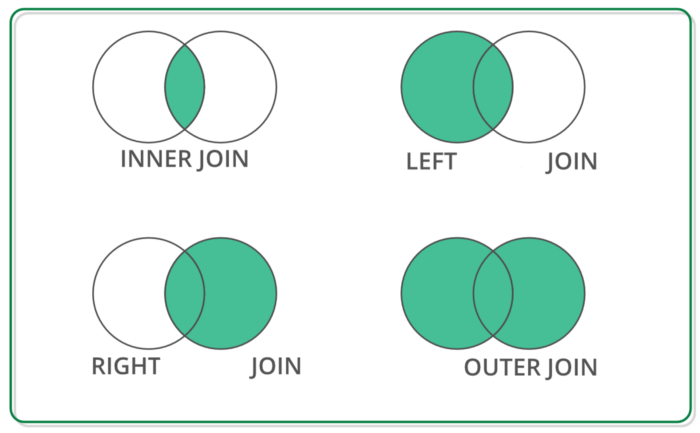

- Para modificar el tipo de mezcla, utilizamos el parámetro `how`

In [ ]:
print(df1)
print('\n----------------------------------\n')
print(df2)
print('\n----------------------------------\n')
pd.merge(df1, df2, on='clave', how='outer') # mantengo todas las filas y relleno con nan

  clave  data1
0     b      0
1     b      1
2     a      2
3     c      3
4     a      4
5     a      5
6     b      6

----------------------------------

  clave  data2
0     a      0
1     b      1
2     d      2

----------------------------------



,clave,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


- ¿Pero que pasa si tenemos claves repetidas en ambos datasets?
- Estos casos son llamados *many-to-many* en bases de datos
- La forma en que se genera la mezcla está bien definida, pero no es necesariamente intuitiva
- Veamos un ejemplo

In [ ]:
df4 = """
clave,data2
a,0
b,1
a,2
b,3
d,4
"""

df4 = pd.read_csv(StringIO(df4))
df4

,clave,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [ ]:
print(df1)
print('\n---------------------------\n')
print(df4)
print('\n---------------------------\n')
pd.merge(df1, df4, on='clave') # por defecto es un inner, i.e., no vamos a tener nans

  clave  data1
0     b      0
1     b      1
2     a      2
3     c      3
4     a      4
5     a      5
6     b      6

---------------------------

  clave  data2
0     a      0
1     b      1
2     a      2
3     b      3
4     d      4

---------------------------



,clave,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,6,1
5,b,6,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


- La mezcla produce todas las combinaciones posibles entre las *clave* en común.
- Como en el `df1` hay tres valores `b`, y en el `df4` hay 2 valores `b`, en el resultado vemos 6 filas con valor `b`
- Esto se conoce como *producto cartesiano* entre las filas.
- Esto sólo afecta a los valores repetidos.

In [ ]:
print(df1)
print('\n--------------------------\n')
print(df4)
print('\n--------------------------\n')

# left join: mantengo todos los del df1. Es decir, podría tener nans en columna data2
mezcla = pd.merge(df1, df4, on='clave', how='left')
mezcla

  clave  data1
0     b      0
1     b      1
2     a      2
3     c      3
4     a      4
5     a      5
6     b      6

--------------------------

  clave  data2
0     a      0
1     b      1
2     a      2
3     b      3
4     d      4

--------------------------



,clave,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,a,5,0.0


- Como vemos, hay sólo una fila con el valor `c`

In [ ]:
mezcla[mezcla['clave'] == 'c']

,clave,data1,data2
6,c,3,NaN


- Si queremos mezclar múltiples claves, necesitamos pasar una lista de claves

In [ ]:
izq_csv = """
clave1,clave2,valor_izq
foo,uno,0
foo,dos,1
bar,uno,2
"""

izq = pd.read_csv(StringIO(izq_csv))
izq

,clave1,clave2,valor_izq
0,foo,uno,0
1,foo,dos,1
2,bar,uno,2


In [ ]:
der_csv = """
clave1,clave2,valor_der
foo,uno,0
foo,uno,1
bar,uno,2
bar,dos,3
"""
der = pd.read_csv(StringIO(der_csv))
der

,clave1,clave2,valor_der
0,foo,uno,0
1,foo,uno,1
2,bar,uno,2
3,bar,dos,3


In [ ]:
print(izq)
print('\n----------------------------\n')
print(der)
print('\n----------------------------\n')

# vamos a mantener todas la filas. Para entenderlo conviene partir desde la tabla que tiene más filas
pd.merge(izq, der, on=['clave1', 'clave2'], how='outer')

  clave1 clave2  valor_izq
0    foo    uno          0
1    foo    dos          1
2    bar    uno          2

----------------------------

  clave1 clave2  valor_der
0    foo    uno          0
1    foo    uno          1
2    bar    uno          2
3    bar    dos          3

----------------------------



,clave1,clave2,valor_izq,valor_der
0,foo,uno,0.0,0.0
1,foo,uno,0.0,1.0
2,foo,dos,1.0,NaN
3,bar,uno,2.0,2.0
4,bar,dos,NaN,3.0


- Para determinar la combinación resultante, se puede considerar cada mezcla de claves como una tupla, y cada tupla se considera una **clave unitaria**.
<br/><br/>
- Un último punto que revisar sobre las mezclas es la forma de lidiar con nombres de columnas repetidos.
- La función `merge` agrega sufijos por defecto a las columnas repetidas, pero los nombres son poco significativos.

In [ ]:
pd.merge(izq, der, on='clave1')

,clave1,clave2_x,valor_izq,clave2_y,valor_der
0,foo,uno,0,uno,0
1,foo,uno,0,uno,1
2,foo,dos,1,uno,0
3,foo,dos,1,uno,1
4,bar,uno,2,uno,2
5,bar,uno,2,dos,3


- Una opción poco práctica es renombrar las columnas manualmente.
- Otra opción es usar el parámetro `suffixes` de la función `merge`, que permite dar *sufijos* al nombre de la columna de cada `DataFrame`.

In [ ]:
pd.merge(izq, der, on='clave1', suffixes=('_izq__', '_der__')) # permite diferenciar columnas con el mismo nombre

,clave1,clave2_izq__,valor_izq,clave2_der__,valor_der
0,foo,uno,0,uno,0
1,foo,uno,0,uno,1
2,foo,dos,1,uno,0
3,foo,dos,1,uno,1
4,bar,uno,2,uno,2
5,bar,uno,2,dos,3


### Mezclando con índices

- En algunos casos, las claves para `merge` serán los índices de las filas.
- En estos casos, debemos usar los parámetros `left_index` o `right_index` (o ambos) con valor `True`.
- De esta forma indicamos que la mezcla se realiza utilizando los índices.

In [ ]:
izq1 = pd.DataFrame({
    'clave':['a','b','a', 'a','b','c'],
    'valor': range(6),
})

izq1

,clave,valor
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [ ]:
der1 = pd.DataFrame({
    'indice':['a', 'b'],
    'val_grupo': [3.5, 7.0]
}).set_index('indice')

der1

,val_grupo
indice,
a,3.5
b,7.0


In [ ]:
# del dataframe izquierdo ocupa la columna clave y del derecho su índice
pd.merge(izq1, der1, left_on='clave', right_index=True)

,clave,valor,val_grupo
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


- Y si queremos contar con todas las filas

In [ ]:
# del dataframe izquierdo ocupa la columna clave y del derecho su índice,con outer merge
pd.merge(izq1, der1, left_on='clave', right_index=True, how='outer')

,clave,valor,val_grupo
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


- Para datos con indexación jerárquica, es un poco más complicado.
- Si mezclamos con el índice jerárquico, implicitamente indicamos una mezcla de múltiples claves.

In [ ]:
izq_jer = pd.DataFrame({
    'ciudad': ['Concepción']*3 + ['Osorno']*2,
    'año':[2000, 2001, 2002,  2001, 2002],
    'data': np.arange(5.)
})

izq_jer

,ciudad,año,data
0,Concepción,2000,0.0
1,Concepción,2001,1.0
2,Concepción,2002,2.0
3,Osorno,2001,3.0
4,Osorno,2002,4.0


In [ ]:
der_jer = pd.DataFrame({
    'ciudad': ['Osorno']*2 + ['Concepción']*4,
    'año': [2001, 2000, 2000, 2000, 2001,  2002],
    'evento1': range(0,12,2),
    'evento2': range(1,13,2)
}).set_index(['ciudad', 'año'])

der_jer

evento1  evento2
ciudad     año                   
Osorno     2001        0        1
           2000        2        3
Concepción 2000        4        5
           2000        6        7
           2001        8        9
           2002       10       11

- En estos casos, necesitamos indicar múltiples columnas para mezclas el índice jerárquico

In [ ]:
# en el dataframe izquierdo utilizamos las columnas (ciudad, año) y en el
# dataframe derecho usamos el índice jerárquico de (ciudad, año)
pd.merge(izq_jer, der_jer, left_on=['ciudad', 'año'], right_index=True)

,ciudad,año,data,evento1,evento2
0,Concepción,2000,0.0,4,5
0,Concepción,2000,0.0,6,7
1,Concepción,2001,1.0,8,9
2,Concepción,2002,2.0,10,11
3,Osorno,2001,3.0,0,1


- Y si queremos todas las filas

In [ ]:
pd.merge(izq_jer, der_jer, left_on=['ciudad', 'año'], right_index=True, how='outer')

,ciudad,año,data,evento1,evento2
0,Concepción,2000,0.0,4.0,5.0
0,Concepción,2000,0.0,6.0,7.0
1,Concepción,2001,1.0,8.0,9.0
2,Concepción,2002,2.0,10.0,11.0
3,Osorno,2001,3.0,0.0,1.0
4,Osorno,2002,4.0,NaN,NaN
4,Osorno,2000,NaN,2.0,3.0


- Por supuesto, también es posible realizar mezclas con ambos índices

In [ ]:
izq_ind = pd.DataFrame({
    'indice': ['a', 'c', 'e'],
    'Iquique': np.arange(0,5., 2.),
    'La Serena': np.arange(1., 7., 2.)
}).set_index('indice')

izq_ind

,Iquique,La Serena
indice,,
a,0.0,1.0
c,2.0,3.0
e,4.0,5.0


In [ ]:
der_ind = pd.DataFrame({
    'indice': ['b','c', 'd', 'e'],
    'Santiago': np.arange(7, 15., 2),
    'Puerto Montt': np.arange(8., 16,2.)
}).set_index('indice')

der_ind

,Santiago,Puerto Montt
indice,,
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [ ]:
# en ambos dataframe utilizamos el índice
pd.merge(izq_ind, der_ind, how='outer', left_index=True, right_index=True)

,Iquique,La Serena,Santiago,Puerto Montt
indice,,,,
a,0.0,1.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,2.0,3.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,4.0,5.0,13.0,14.0


- Los `DataFrames` tienen un método `join`, que permite mezclar utilizando **índices**.
- También se utiliza para mezclar muchos `DataFrames` que tienen índices iguales o similares.
- **La única restricción es que las columnas no pueden estar repetidas.**

### DataFrame join

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

print(izq_ind)
print('\n----------------------------------------------------\n')
print(der_ind)
print('\n----------------------------------------------------\n')

izq_ind.join(der_ind, how='outer') # por defecto es índice con índice 

        Iquique  La Serena
indice                    
a           0.0        1.0
c           2.0        3.0
e           4.0        5.0

----------------------------------------------------

        Santiago  Puerto Montt
indice                        
b            7.0           8.0
c            9.0          10.0
d           11.0          12.0
e           13.0          14.0

----------------------------------------------------



,Iquique,La Serena,Santiago,Puerto Montt
indice,,,,
a,0.0,1.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,2.0,3.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,4.0,5.0,13.0,14.0


- Por defecto, y por razones de compatibilidad con versiones iniciales de `pandas`, **el método `join` realiza por defecto un *left join*.**
- Así, se mantienen todos los índices del objeto que invoca al método `join`.
- Además, se puede realizar un `join` indicando la columna clave del `DataFrame` que realiza la invocación.

In [ ]:
print(izq1)
print('\n-----------------------------\n')
print(der1)
print('\n-----------------------------\n')

# izq1 utiliza columna clave y der1 su índice
izq1.join(der1, on='clave') # on: Column or index level name(s) in the caller to join on the index in other, otherwise joins index-on-index

  clave  valor
0     a      0
1     b      1
2     a      2
3     a      3
4     b      4
5     c      5

-----------------------------

        val_grupo
indice           
a             3.5
b             7.0

-----------------------------



,clave,valor,val_grupo
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


- Finalmente, para mezclar con índices, se pueden pasar una lista de `DataFrames` al método `join`.

In [ ]:
otro = pd.DataFrame({
    'indice': ['a', 'c', 'e', 'f'],
    'Valdivia': [7., 9., 11.,16],
    'Concepción': [8., 10, 12, 17],
}).set_index('indice')

otro

,Valdivia,Concepción
indice,,
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [ ]:
print(izq_ind)
print('\n-----------------------------\n')
print(der_ind)
print('\n-----------------------------\n')
print(otro)
print('\n-----------------------------\n')

izq_ind.join([der_ind, otro])

        Iquique  La Serena
indice                    
a           0.0        1.0
c           2.0        3.0
e           4.0        5.0

-----------------------------

        Santiago  Puerto Montt
indice                        
b            7.0           8.0
c            9.0          10.0
d           11.0          12.0
e           13.0          14.0

-----------------------------

        Valdivia  Concepción
indice                      
a            7.0         8.0
c            9.0        10.0
e           11.0        12.0
f           16.0        17.0

-----------------------------



,Iquique,La Serena,Santiago,Puerto Montt,Valdivia,Concepción
indice,,,,,,
a,0.0,1.0,NaN,NaN,7.0,8.0
c,2.0,3.0,9.0,10.0,9.0,10.0
e,4.0,5.0,13.0,14.0,11.0,12.0


In [ ]:
izq_ind.join([der_ind, otro], how='outer')

,Iquique,La Serena,Santiago,Puerto Montt,Valdivia,Concepción
a,0.0,1.0,NaN,NaN,7.0,8.0
c,2.0,3.0,9.0,10.0,9.0,10.0
e,4.0,5.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenando en un eje

- Otro tipo de operación de combinación es llamado de forma intercambiable como *concatenación*, *agrupación* o *apilación*
- `numpy` permite hacer esto con sus arreglos

In [ ]:
arreglo = np.arange(12).reshape((3, 4))
arreglo

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

- *numpy concatenate* ya lo vimos en clases pasadas

In [ ]:
# esto ya lo vimos en clases pasadas
np.concatenate([arreglo, arreglo]) # por defecto axis=0

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

- Por defecto se apilan las filas, o `axis=0`.
- Pero podemos indicar el eje por el que se concatenan.

In [ ]:
np.concatenate([arreglo, arreglo], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

- **En el contexto de las estructuras de `pandas` (como `Series` y `DataFrames`)**, al tener ejes con etiquetas, permite ir mas allá que la concatenación de arreglos.
- En particular, tenemos algunos puntos adicionales que considerar
  - Si los objetos tienen indexados diferentes, ¿debemos combinar los elementos compartidos solamente? (*ie*, la intersección)
  - ¿Deben ser identificables las porciones de datos en el resultado?
  - ¿El "eje de concatenación" contiene datos que deben preservarse? En muchos casos, es mejor que las etiquetas por defecto de un `DataFrame` se descarten


- La función `concat` en `pandas` provee una forma consistente de revisar estos casos.

In [ ]:
s1 = pd.Series([0, 1], index=['a', 'b'], name='s1')
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'], name='s2')
s3 = pd.Series([5, 6], index=['f', 'g'], name='s3')
print(s1)
print("*****************")
print(s2)
print("*****************")
print(s3)

a    0
b    1
Name: s1, dtype: int64
*****************
c    2
d    3
e    4
Name: s2, dtype: int64
*****************
f    5
g    6
Name: s3, dtype: int64


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html

pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

- Por defecto, la concatenación funciona en el eje de las filas (`axis=0`), igual que en `numpy`.
- Si cambiamos el eje, el resultado será un `DataFrame`.

In [ ]:
pd.concat([s1, s2, s3], axis='columns') # es equivalente a axis=1

,s1,s2,s3
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


- En este caso no hay superposición en ninguno de los ejes, podemos ver que la mezcla es por defecto un ***outer join***.
- Si quisiéramos intersectar, podemos usar el parámetro de `pd.concat`; `join`.

In [ ]:
s4 = pd.concat([s1, s3])
s4.name='s4'
s4

a    0
b    1
f    5
g    6
Name: s4, dtype: int64

In [ ]:
print(s1)
print('\n-----------------------------\n')
print(s4)
print('\n-----------------------------\n')
pd.concat([s1, s4], axis='columns')

a    0
b    1
Name: s1, dtype: int64

-----------------------------

a    0
b    1
f    5
g    6
Name: s4, dtype: int64

-----------------------------



,s1,s4
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [ ]:
pd.concat([s1, s4], axis='columns', join='inner') # la única intersección es índices a y b 

,s1,s4
a,0,0
b,1,1


- Vemos que las filas `f`, y `g` desaparecen en la intersección.
- Un potencial problema es que las partes concatenadas no serán identificables en el resultado.
- Supongamos que entonces queremos crear un índice jerárquico en el eje concatenado.
- Para esto, usamos el parámetro `keys`.

In [ ]:
print(s1)
print('\n-----------------------------\n')
print(s2)
print('\n-----------------------------\n')
print(s3)
print('\n-----------------------------\n')
resultado = pd.concat([s1, s2, s3], keys=['serie1', 'serie2', 'serie3'])
resultado

a    0
b    1
Name: s1, dtype: int64

-----------------------------

c    2
d    3
e    4
Name: s2, dtype: int64

-----------------------------

f    5
g    6
Name: s3, dtype: int64

-----------------------------



serie1  a    0
        b    1
serie2  c    2
        d    3
        e    4
serie3  f    5
        g    6
dtype: int64

In [ ]:
resultado.unstack() # toma el índice jeráquico y construye un dataframe

,a,b,c,d,e,f,g
serie1,0.0,1.0,NaN,NaN,NaN,NaN,NaN
serie2,NaN,NaN,2.0,3.0,4.0,NaN,NaN
serie3,NaN,NaN,NaN,NaN,NaN,5.0,6.0


- En el caso de concatenar en el eje de las columnas, las `keys` se transforman en el nombre de las columnas.

In [ ]:
# concatenamos 3 series como columnas para formar un dataframe
print(s1)
print('\n-----------------------------\n')
print(s2)
print('\n-----------------------------\n')
print(s3)
print('\n-----------------------------\n')

pd.concat([s1, s2, s3], axis='columns', keys=['col_1', 'col_2', 'col_3'])

a    0
b    1
Name: s1, dtype: int64

-----------------------------

c    2
d    3
e    4
Name: s2, dtype: int64

-----------------------------

f    5
g    6
Name: s3, dtype: int64

-----------------------------



,col_1,col_2,col_3
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


- La misma lógica es extensible a `DataFrames`.



In [ ]:
df1 = pd.DataFrame({
    'indice': ['a', 'b', 'c'],
    'uno': [0,2,4],
    'dos':[1,3,5]
}).set_index('indice')

df1

,uno,dos
indice,,
a,0,1
b,2,3
c,4,5


In [ ]:
df2 = pd.DataFrame({
    'indice': ['a', 'c'],
    'tres': [5,7],
    'cuatro': [6,8]
}).set_index('indice')

df2

,tres,cuatro
indice,,
a,5,6
c,7,8


In [ ]:
print(df1)
print('\n---------------------------\n')
print(df2)
print('\n---------------------------\n')
pd.concat([df1, df2], axis='columns', keys=['df1', 'df2'])

        uno  dos
indice          
a         0    1
b         2    3
c         4    5

---------------------------

        tres  cuatro
indice              
a          5       6
c          7       8

---------------------------



df1      df2       
  uno dos tres cuatro
a   0   1  5.0    6.0
b   2   3  NaN    NaN
c   4   5  7.0    8.0

- Si en vez de pasar una lista de objetos, pasamos un diccionario, las claves del diccionario serán utilizadas como el parámetro `keys`

In [ ]:
pd.concat({'df1': df1, 'df2': df2}, axis=1)

df1      df2       
  uno dos tres cuatro
a   0   1  5.0    6.0
b   2   3  NaN    NaN
c   4   5  7.0    8.0

- Finalmente, una última consideración es en el caso de que los índices concatenados no aporten información útil, se pueden descartar.
- Para descartar las etiquetas del índice, usamos el parámetro `ignore_index`.

In [ ]:
pd.concat([df1, df2], axis='columns')

,uno,dos,tres,cuatro
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


In [ ]:
pd.concat([df1, df2], axis='columns', ignore_index=True)

,0,1,2,3
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


### Combinando datos con superposiciones

- Hay otro caso de combinación de datos que no puede considerarse ni mezcla ni concatenación.
- Podríamos contar con dos datasets cuyos índices estén superpuestos total o parcialmente.

In [ ]:
a = pd.Series(
    [np.nan, 2.5, 0, 3.5, 4.5, np.nan],
    index=['a', 'b', 'c', 'd', 'e', 'f'],
    name='a'
)

a

a    NaN
b    2.5
c    0.0
d    3.5
e    4.5
f    NaN
Name: a, dtype: float64

In [ ]:
b = pd.Series(
    [0., np.nan, 2., np.nan, np.nan, 5.],
    index=a.index,
    name='b'
)

b

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
Name: b, dtype: float64

In [ ]:
pd.concat([a, b], axis='columns')

,a,b
a,NaN,0.0
b,2.5,NaN
c,0.0,2.0
d,3.5,NaN
e,4.5,NaN
f,NaN,5.0


- Podemos ver que la serie `a` tiene los valores que para `b` están marcados como perdidos
- Para completar los datos perdidos de `b` con los que tiene `a`, usamos el método `combine_first`

In [ ]:
print(a)
print('\n---------------------------\n')
print(b)
print('\n---------------------------\n')

b.combine_first(a) # rellena los valores nulos de b, con los valores de a

a    NaN
b    2.5
c    0.0
d    3.5
e    4.5
f    NaN
Name: a, dtype: float64

---------------------------

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
Name: b, dtype: float64

---------------------------



a    0.0
b    2.5
c    2.0
d    3.5
e    4.5
f    5.0
Name: b, dtype: float64

- Con `DataFrames`, el método `combine_first` hace exactamente lo mismo, pero columna por columna
- Así podemos *parchar* datos perdidos del objeto que invoca el método con datos del objeto pasado como argumento.

In [ ]:
df1 = pd.DataFrame({
    'a': [1,np.nan, 5.,np.nan],
    'b': [np.nan, 2.,np.nan, 6],
    'c': [2,6,10,14]
})

df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [ ]:
df2 = pd.DataFrame({
    'a': [5, 4., np.nan, 3, 7],
    'b': [np.nan, 3., 4.,6, 8]
})

df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [ ]:
print(df1)
print('\n------------------------\n')
print(df2)
print('\n------------------------\n')

df1.combine_first(df2) # notar que agrega la columna 4 del df2

     a    b   c
0  1.0  NaN   2
1  NaN  2.0   6
2  5.0  NaN  10
3  NaN  6.0  14

------------------------

     a    b
0  5.0  NaN
1  4.0  3.0
2  NaN  4.0
3  3.0  6.0
4  7.0  8.0

------------------------



,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Reorganizando y pivotando

- Existen dos operaciones de reordenación de datos tabulares
  - Reorganizar
  - Pivotar

### Reorganizando con indexación jerárquica

- La indexación jerárquica provee una forma consistente de reordenar datos en un `DataFrame` incorporando varias *dimensiones*.
- Los métodos principales son `stack` y `unstack`, que vimos en la primera parte de la clase.

In [ ]:
df1 = pd.DataFrame({
    'a': [1,np.nan, 5.,np.nan],
    'b': [np.nan, 2.,np.nan, 6],
    'c': [2,6,10,14]
})

df1.columns.name='letra'
df1.index.name='numero'

df1

letra,a,b,c
numero,,,
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [ ]:
apilado = df1.stack() # transformar el dataframe a una series con índice jerárquico
print(type(apilado))
apilado

<class 'pandas.core.series.Series'>


numero  letra
0       a         1.0
        c         2.0
1       b         2.0
        c         6.0
2       a         5.0
        c        10.0
3       b         6.0
        c        14.0
dtype: float64

- Notar que los datos perdidos no se mantienen al apilar (`stack`) un `DataFrame` en la forma de `Series` con indexado jerárquico.
- Si queremos mantener los datos perdidos, usamos el parámetro `dropna=False`.

In [ ]:
df1.stack(dropna=False)

numero  letra
0       a         1.0
        b         NaN
        c         2.0
1       a         NaN
        b         2.0
        c         6.0
2       a         5.0
        b         NaN
        c        10.0
3       a         NaN
        b         6.0
        c        14.0
dtype: float64

- Si tenemos un indexado múltiple en las filas de un `DataFrame`, podemos indicar el nombre del nivel del índice que queremos apilar o desapilar.

In [ ]:
df1['ciudad'] = ['Santiago', 'Santiago', 'Concepción', 'Concepción']
df1

letra,a,b,c,ciudad
numero,,,,
0,1.0,NaN,2,Santiago
1,NaN,2.0,6,Santiago
2,5.0,NaN,10,Concepción
3,NaN,6.0,14,Concepción


In [ ]:
df1 = df1.set_index('ciudad', append=True).swaplevel('ciudad', 'numero') # append columns to existing index.
df1

letra                a    b   c
ciudad     numero              
Santiago   0       1.0  NaN   2
           1       NaN  2.0   6
Concepción 2       5.0  NaN  10
           3       NaN  6.0  14

In [ ]:
df1.unstack('ciudad')

letra           a                   b                   c         
ciudad Concepción Santiago Concepción Santiago Concepción Santiago
numero                                                            
0             NaN      1.0        NaN      NaN        NaN      2.0
1             NaN      NaN        NaN      2.0        NaN      6.0
2             5.0      NaN        NaN      NaN       10.0      NaN
3             NaN      NaN        6.0      NaN       14.0      NaN

### Pivotando de formato largo a ancho

- Una forma común de almacenar múltiples series de tiempo en bases de datos o CSV, es en el *formato largo* o *apilado*.
- Veamos un ejemplo de este tipo de guardado, y veamos como podemos consolidar y limpiar estos datos.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/pgalilea/datasets/main/csv/macrodata.csv')
print(data.shape)
data

(203, 14)


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


- Vamos a crear un nuevo tipo de índice, de tipo `PeriodIndex`.

In [ ]:
print(data.year)
print('\n---------------------------------------\n')
print(data.quarter)

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

---------------------------------------

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64


In [ ]:
periodos = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='fecha')
periodos

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='fecha', length=203, freq='Q-DEC')

- En resumen, combinamos años y trimestres para crear un tipo de intervalo de tiempo.

In [ ]:
columnas = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
columnas

Index(['realgdp', 'infl', 'unemp'], dtype='object', name='item')

In [ ]:
data = data.reindex(columns=columnas) # dejamos solo algunas columnas
data.index = periodos.strftime('%Y-%m-%d') # de PeriodIndex a str
data

item,realgdp,infl,unemp
fecha,,,
1959-03-31,2710.349,0.00,5.8
1959-06-30,2778.801,2.34,5.1
1959-09-30,2775.488,2.74,5.3
1959-12-31,2785.204,0.27,5.6
1960-03-31,2847.699,2.31,5.2
...,...,...,...
2008-09-30,13324.600,-3.16,6.0
2008-12-31,13141.920,-8.79,6.9
2009-03-31,12925.410,0.94,8.1


In [ ]:
# 1.- Con .stack() creamos una series con índices (fecha, item)
# 2.- Con reset_index se pasan los índices a columnas

flargo = data.stack().reset_index().rename(columns={0: 'valor'})
flargo

,fecha,item,valor
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
...,...,...,...
604,2009-06-30,infl,3.370
605,2009-06-30,unemp,9.200
606,2009-09-30,realgdp,12990.341
607,2009-09-30,infl,3.560


- Este formato es llamado *formato largo* (o *long format*).
- Se utiliza con múltiples series de tiempo, u otros datos de observación con dos o más claves.
- En este caso, las claves son *fecha* e *item*
- Cada fila en esta tabla representa una observación particular.

- Los datos son frecuentemente almacenados de esta forma en bases de datos relacionales (*SQL*).
- En el ejemplo, las columnas *fecha* e *item* serían en conjunto la *llave primaria*.
- En algunos casos, puede ser más difícil manejar los datos en este formato.
- En esos casos, puede ser preferible tener un `DataFrame` con una columna distinta por cada valor en la columna `item`, indexado por la columna `fecha` (como estaba al inicio).
- Para lograr esto, el método `pivot` nos permite hacer esta transformación.

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html

pivote = flargo.pivot('fecha', 'item', 'valor') #  (index=None, columns=None, values=None)
pivote # formato ancho

item,infl,realgdp,unemp
fecha,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2
...,...,...,...
2008-09-30,-3.16,13324.600,6.0
2008-12-31,-8.79,13141.920,6.9
2009-03-31,0.94,12925.410,8.1


- El primer parámetro es la columna que será utilizada como el índice de las filas.
- El segundo parámetro es la columna que será utilizada como el índice (o nombre) de columnas.
- El tercer parámetro, que es opcional, indica la columna que dará los valores del `DataFrame`.

### Pivotando de formato ancho a largo

- La operación inversa de `pivot` (largo a ancho) para `DataFrames` es `pandas.melt` (ancho a largo).
- En lugar de transformar una columna en muchas columnas, mezcla múltiples columnas en una sola.

In [ ]:
df = pd.DataFrame({
    'clave': ['foo', 'bar', 'caz'],
    'A': [1,2,3],
    'B': [4,5,6],
    'C': [7,8,9]
})

df

,clave,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,caz,3,6,9


- En este ejemplo, la columna `clave` es un buen identificador de cada grupo, y las otras columnas son columnas con valores
- Al usar `pandas.melt`, debemos indicar qué columnas son indicadores grupales (si es que hay)

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html

print(df)
print('\n------------------------------\n')

fundido = pd.melt(df, ['clave']) # A=>1,2,3 y B=>4,5,6 y C=>7,8,9
fundido

  clave  A  B  C
0   foo  1  4  7
1   bar  2  5  8
2   caz  3  6  9

------------------------------



,clave,variable,value
0,foo,A,1
1,bar,A,2
2,caz,A,3
3,foo,B,4
4,bar,B,5
5,caz,B,6
6,foo,C,7
7,bar,C,8
8,caz,C,9


- Usando el método `pivot`, podemos reorganizar al formato original

In [ ]:
reorganizado = fundido.pivot('clave', 'variable', 'value')
reorganizado

variable,A,B,C
clave,,,
bar,2,5,8
caz,3,6,9
foo,1,4,7


- Como el método `pivot` crea un índice con la columna utilizada como etiqueta de las filas, podemos utilizar `reset_index` para que el índice vuelva a ser una columna.

In [ ]:
reorganizado.reset_index()

variable,clave,A,B,C
0,bar,2,5,8
1,caz,3,6,9
2,foo,1,4,7


- También podemos especificar un subgrupo de columnas a utilizar como columnas con valores

In [ ]:
print(df)
print('\n------------------------------\n')
pd.melt(df, id_vars=['clave'], value_vars=['A', 'B']) # no consideramos C

  clave  A  B  C
0   foo  1  4  7
1   bar  2  5  8
2   caz  3  6  9

------------------------------



,clave,variable,value
0,foo,A,1
1,bar,A,2
2,caz,A,3
3,foo,B,4
4,bar,B,5
5,caz,B,6


- O podemos no utilizar un descriptor de filas

In [ ]:
pd.melt(df, value_vars=['A', 'B', 'C']) # no hay columna con id

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [ ]:
pd.melt(df, value_vars=['clave', 'B', 'C']) # no consideramos A

,variable,value
0,clave,foo
1,clave,bar
2,clave,caz
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


## Referencias
- https://stackoverflow.com/q/50413993/1510734
- https://pandas.pydata.org/docs/user_guide/merging.html
- https://www.kite.com/blog/python/pandas-merge-join-concat/
- https://pandas.pydata.org/docs/reference/api/pandas.merge.html (pd.merge)
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html (DataFrame.merge)
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html (DataFrame.join)
- https://pandas.pydata.org/docs/reference/api/pandas.concat.html (pd.concat)
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.combine_first.html
- https://realpython.com/pandas-merge-join-and-concat/

## Lectura complementaria
- https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html
- https://stackoverflow.com/q/26486501/1510734
- https://towardsdatascience.com/how-to-use-multiindex-in-pandas-to-level-up-your-analysis-aeac7f451fce
- https://stackoverflow.com/a/37891437/1510734